0.10907127514430776
0.10907127514430776
0.013413897707220741
0.013413897707220741
0.006314903918205458
0.006314903918205458
0.004118432760153154
0.004118432760153154
0.00627727372222827
0.00627727372222827
0.001859334918432048
0.001859334918432048
0.00019841392867939745
0.00019841392867939745
0.0005154164428125117
0.0005154164428125117
[[ 0.002456  0.008841  0.035614  0.157917  0.506894  2.004597  7.935924
  31.315087]
 [ 0.002017  0.002844  0.005331  0.013941  0.039242  0.084738  0.195248
   0.479325]]


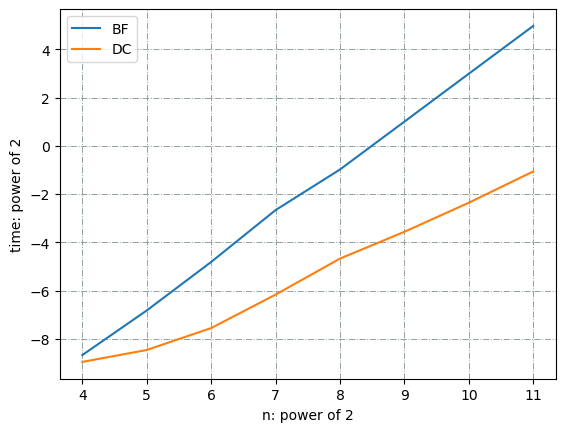

In [13]:
import time
import matplotlib.pyplot as plt
import numpy as np


def dist(u, v):  # 计算距离
    return np.linalg.norm(u - v)


def closest_pair(low, high, sort_y):
    if high - low <= 2:  # 如果不超过3个点 不再递归 直接求最小距离
        closest = float("inf")
        for i in range(low, high + 1):
            for j in range(i + 1, high + 1):
                closest = min(closest, dist(v[i], v[j]))
        return closest

    mid = int((low + high) / 2)
    xmid = (v[mid, 0] + v[mid + 1, 0]) / 2  # 中线位置

    index = [i for i in sort_y if low <= i and i <= mid]  # 左半元素按y升序后的索引
    delta_left = closest_pair(low, mid, index)

    index = [i for i in sort_y if mid + 1 <= i and i <= high]  # 右半元素按y升序后的索引
    delta_right = closest_pair(mid + 1, high, index)

    delta = min(delta_left, delta_right)

    index = []
    for i in sort_y:
        if v[i, 0] <= xmid + delta and v[i, 0] >= xmid - delta:  # 中间带状区域中的点
            index.append(i)

    closest = float("inf")
    l = len(index)
    for i in range(l):  # 计算带状区域中的最近点对
        for j in range(i + 1, min(i + 8, l)):  # 最多考虑7个点
            closest = min(closest, dist(v[index[i]], v[index[j]]))

    return min(closest, delta)


np.random.seed(0)

trial = 8
time_cost = np.zeros([2, trial])

for t in range(trial):

    n = 2**(t + 4)
    v = np.random.rand(n, 2)     # 随机生成n个点

    start = time.perf_counter()
    closest = float("inf")
    for i in range(n):
        for j in range(i + 1, n):
            closest = min(closest, dist(v[i], v[j]))  # 暴力穷举
    time_cost[0, t] = time.perf_counter() - start
    print(closest)

    start = time.perf_counter()
    v = v[v[:, 0].argsort()]    # 对v按x升序
    sort_y = v[:, 1].argsort()  # 对v按y升序 sort_y记录升序后元素在原来v中的索引
    closest = closest_pair(0, n - 1, sort_y)
    time_cost[1, t] = time.perf_counter() - start
    print(closest)

np.set_printoptions(precision=6, suppress=True)
print(time_cost)

x = [v for v in range(4, 4 + trial)]
plt.plot(x, np.log2(time_cost[0, :]), label="BF")  # 对数坐标轴
plt.plot(x, np.log2(time_cost[1, :]), label="DC")  # 对数坐标轴
plt.xlabel('n: power of 2')
plt.ylabel('time: power of 2')
plt.legend()
plt.grid(color='#93a1a1', linestyle='-.', linewidth=0.7)
plt.show()